# 1-1

In [104]:
#توضیحی در گزارش

# 1-2 Generate Dataset

In [105]:
from sklearn.datasets import load_breast_cancer, make_classification, make_blobs, make_circles, load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.plotting import plot_decision_regions

In [106]:
# Generate dataset
X, y = make_classification(n_samples=1000,
                           n_features=3,
                           n_classes=4,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep=2,
                           #n_informative = 3,
                           random_state=4)
print(X.shape, y.shape)

(1000, 3) (1000,)


In [107]:
# Create a DataFrame from the generated dataset
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3'])
df['Target'] = y

# Plot the dataset using Plotly Express
fig = px.scatter_3d(df, x='Feature 1', y='Feature 2', z='Feature 3', color='Target', title='make_classification Dataset')
fig.show()

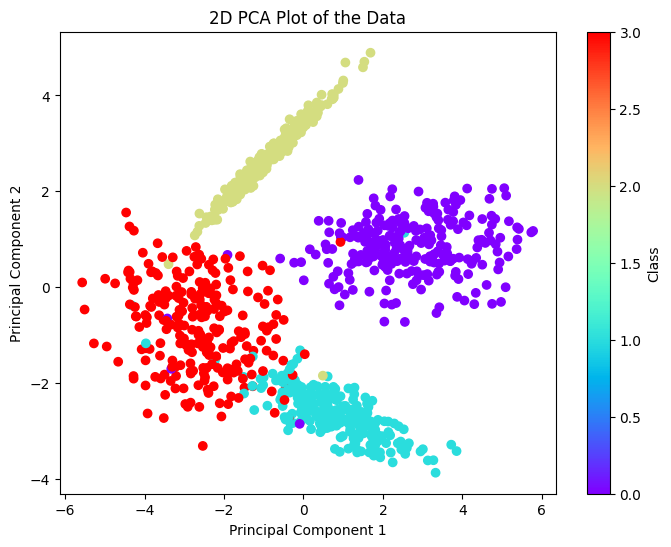

In [108]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.rainbow)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Plot of the Data')

plt.colorbar(label='Class')

plt.show()

# 1-3 Train Model


## LogisticRegression

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 3), (800,), (200, 3), (200,))

In [110]:
# Compute the range for each feature
feature_ranges = [(np.min(X_train[:, i]), np.max(X_train[:, i])) for i in range(X_train.shape[1])]

# Print the range for each feature
for i, (min_val, max_val) in enumerate(feature_ranges):
    print(f"Feature {i+1}: Range = ({min_val}, {max_val})")

Feature 1: Range = (-4.802236114367438, 4.716621174692759)
Feature 2: Range = (-5.126933452031901, 4.108274188892768)
Feature 3: Range = (-3.2146554969049794, 2.8715878457267467)


In [111]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
C_values = np.linspace(0.01, 1, 50)
solver_list = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
best_result = 0
for C in C_values:
  for solver in solver_list:
    for i in np.linspace(1e-5, 1e-3, 50):
      LR_model = LogisticRegression(penalty='l2',
                              dual=False,
                              tol = i,
                              solver = solver,
                              max_iter=1000,
                              C = C,
                              random_state=4)
      LR_model.fit(X_train, y_train)
      result = LR_model.score(X_train, y_train)
      if result > best_result:
        best_result = result
        print (f"best result is {best_result} with solver: {solver} , C= {C}  and tol= {i}")

best result is 0.96875 with solver: lbfgs , C= 0.01  and tol= 1e-05
best result is 0.97125 with solver: lbfgs , C= 0.030204081632653063  and tol= 1e-05
best result is 0.9725 with solver: sag , C= 0.333265306122449  and tol= 0.0005555102040816327


In [113]:
best_result = 0
for C in C_values:
  for solver in solver_list:
    for i in np.linspace(1e-5, 1e-3, 50):
      LR_model = LogisticRegression(penalty='l2',
                              dual=False,
                              tol = i,
                              solver = solver,
                              max_iter=1000,
                              C = C,
                              random_state=4)
      LR_model.fit(X_train_scaled, y_train)
      result = LR_model.score(X_train_scaled, y_train)
      if result > best_result:
        best_result = result
        print (f"best result is {best_result} with solver: {solver} , C= {C}  and tol= {i}")

best result is 0.9625 with solver: lbfgs , C= 0.01  and tol= 1e-05
best result is 0.96625 with solver: lbfgs , C= 0.030204081632653063  and tol= 1e-05
best result is 0.9675 with solver: lbfgs , C= 0.35346938775510206  and tol= 1e-05
best result is 0.96875 with solver: sag , C= 0.7979591836734694  and tol= 0.0007575510204081633


In [114]:
LR_model = LogisticRegression(penalty='l2',
                              dual=False,
                              tol = 1e-05,
                              solver='lbfgs',
                              max_iter=1000,
                              C=0.9393877551020408,
                              random_state=4)
LR_model.fit(X_train, y_train)
LR_model.predict(X_test), y_test

(array([2, 1, 1, 3, 2, 3, 3, 3, 3, 3, 0, 0, 3, 1, 2, 1, 1, 0, 2, 3, 3, 1,
        2, 1, 1, 2, 2, 1, 3, 0, 0, 0, 2, 3, 0, 0, 3, 2, 1, 2, 1, 1, 1, 1,
        3, 1, 1, 1, 1, 0, 3, 0, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 2, 0, 0, 2,
        3, 2, 2, 0, 2, 1, 2, 1, 3, 2, 3, 0, 3, 0, 2, 3, 2, 0, 0, 2, 2, 2,
        0, 3, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2,
        0, 2, 2, 1, 1, 3, 0, 1, 0, 3, 2, 0, 2, 1, 3, 0, 0, 2, 0, 3, 1, 2,
        2, 3, 2, 2, 3, 1, 3, 1, 0, 2, 0, 0, 3, 0, 3, 3, 3, 0, 2, 1, 1, 2,
        1, 3, 1, 1, 1, 3, 3, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 3, 1, 2,
        0, 3, 3, 0, 3, 2, 1, 3, 3, 3, 3, 2, 3, 2, 2, 1, 2, 1, 3, 3, 0, 0,
        3, 3]),
 array([2, 1, 1, 3, 2, 3, 3, 3, 3, 1, 0, 0, 3, 1, 2, 1, 1, 0, 2, 3, 3, 1,
        2, 1, 1, 2, 2, 1, 3, 0, 0, 0, 2, 3, 0, 0, 3, 2, 1, 2, 1, 1, 1, 1,
        3, 1, 1, 1, 1, 0, 3, 0, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 2, 0, 0, 2,
        3, 2, 2, 0, 2, 1, 2, 1, 3, 2, 3, 0, 3, 0, 2, 3, 2, 0, 0, 2, 2, 2,
        0, 3, 1, 2, 2,

In [115]:
LR_model.fit(X_train, y_train)
LR_model.predict(X_test), y_test

print("LR_model train score = ", LR_model.score(X_train, y_train))
print("LR_model predict score = ", LR_model.score(X_test, y_test))

LR_model train score =  0.9725
LR_model predict score =  0.98


## SGDClassifier

In [116]:
loss_list = ['hinge', 'log_loss', 'squared_hinge', 'squared_error', 'huber']
learning_rate = ['optimal', 'adaptive']
best_result = 0
for loss in loss_list:
  for lr in learning_rate:
    for eta in np.linspace(1e-3, 30, 50):
      SGD_model = SGDClassifier(loss=loss,
                                max_iter =2000,
                                tol = 1e-3,
                                eta0 = eta,
                                learning_rate = lr,
                                random_state=4)
      SGD_model.fit(X_train, y_train)
      result = SGD_model.score(X_train, y_train)
      if result > best_result:
        best_result = result
        print (f"best result is {best_result} with loss: {loss} , learning rate= {lr} and eta0= {eta}")

best result is 0.95875 with loss: hinge , learning rate= optimal and eta0= 0.001
best result is 0.9625 with loss: hinge , learning rate= adaptive and eta0= 0.001
best result is 0.96625 with loss: hinge , learning rate= adaptive and eta0= 0.6132244897959184
best result is 0.9675 with loss: hinge , learning rate= adaptive and eta0= 6.735469387755102


In [117]:
SGD_model = SGDClassifier(loss='hinge' ,
                          max_iter =2000,
                          tol = 1e-3,
                          eta0 = 6.735469387755102,
                          learning_rate = 'adaptive' ,
                          random_state=4)
SGD_model.fit(X_train, y_train)
SGD_model.predict(X_test), y_test

(array([2, 1, 1, 3, 2, 3, 3, 3, 3, 3, 0, 0, 3, 1, 2, 1, 1, 0, 2, 3, 3, 1,
        2, 1, 1, 2, 2, 1, 3, 0, 0, 0, 2, 3, 0, 0, 3, 2, 1, 2, 1, 1, 1, 1,
        3, 1, 1, 1, 1, 0, 3, 0, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 2, 0, 0, 2,
        3, 2, 2, 0, 2, 3, 2, 1, 3, 2, 3, 0, 3, 0, 2, 3, 2, 0, 0, 2, 2, 2,
        0, 3, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2,
        0, 2, 2, 1, 1, 3, 0, 1, 0, 3, 2, 0, 2, 1, 3, 0, 0, 2, 0, 3, 1, 2,
        2, 3, 2, 2, 3, 1, 3, 1, 0, 2, 0, 0, 3, 0, 3, 3, 3, 0, 2, 1, 1, 2,
        1, 3, 1, 1, 1, 3, 3, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 3, 1, 2,
        0, 3, 3, 0, 3, 2, 1, 3, 3, 3, 3, 2, 3, 2, 2, 1, 2, 1, 3, 3, 0, 0,
        3, 3]),
 array([2, 1, 1, 3, 2, 3, 3, 3, 3, 1, 0, 0, 3, 1, 2, 1, 1, 0, 2, 3, 3, 1,
        2, 1, 1, 2, 2, 1, 3, 0, 0, 0, 2, 3, 0, 0, 3, 2, 1, 2, 1, 1, 1, 1,
        3, 1, 1, 1, 1, 0, 3, 0, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 2, 0, 0, 2,
        3, 2, 2, 0, 2, 1, 2, 1, 3, 2, 3, 0, 3, 0, 2, 3, 2, 0, 0, 2, 2, 2,
        0, 3, 1, 2, 2,

In [118]:
SGD_model.fit(X_train, y_train)
SGD_model.predict(X_test), y_test

print("SGD_model train score = ", SGD_model.score(X_train, y_train))
print("SGD_model predict score = ", SGD_model.score(X_test, y_test))

SGD_model train score =  0.9675
SGD_model predict score =  0.975


# 1-4 Plot Decision Boundary

In [119]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [120]:
X.shape

(1000, 3)

In [121]:
# Fit logistic regression model
LR_model_pca = LogisticRegression(penalty='l2',
                              dual=False,
                              tol=1e-05,
                              solver='lbfgs',
                              max_iter=1000,
                              C=0.9393877551020408,
                              random_state=4)
LR_model_pca.fit(X_train_pca, y_train)
LR_model_pca.predict(X_test_pca)
print(LR_model_pca.score(X_train_pca, y_train))
print(LR_model_pca.score(X_test_pca, y_test))

0.97125
0.98


In [122]:
X_pca.shape

(1000, 2)

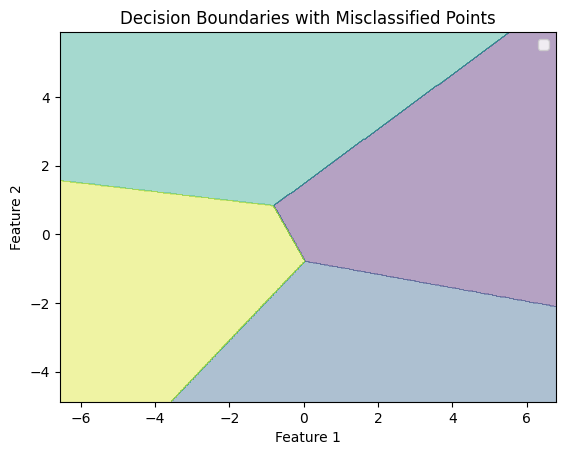

In [123]:
x1_min, x1_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
x2_min, x2_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                       np.linspace(x2_min, x2_max, 500))

Z = LR_model_pca.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4)

predicted_classes = LR_model_pca.predict(X_pca)
misclassified_indices = np.where(predicted_classes != y)[0]
misclassified_points = X_pca[misclassified_indices]

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries with Misclassified Points')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



<Axes: >

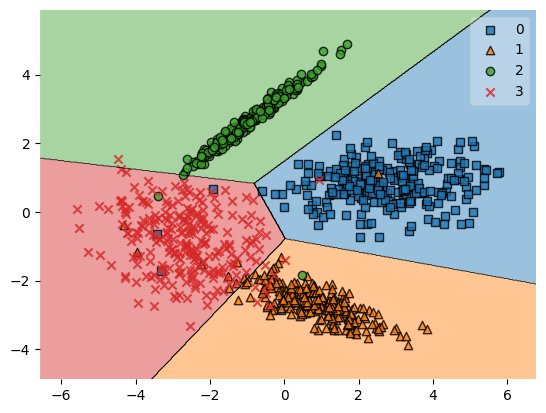

In [124]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_pca, y, clf=LR_model_pca)

# 1-5 draw data

In [125]:
!pip install drawdata

In [126]:
from drawdata import ScatterWidget

In [127]:
widget = ScatterWidget()
widget

ScatterWidget()

In [130]:
# Get the drawn data as a list of dictionaries
widget.data
# Get the drawn data as a dataframe
draedata_df = widget.data_as_pandas

draedata_df.replace({'a': 1, 'b': 2, 'c': 3, 'd': 4}, inplace=True)
draedata_df

,x,y,color,label
0,143.258538,440.305948,#1f77b4,1
1,135.100580,449.616353,#1f77b4,1
2,72.404797,412.297063,#1f77b4,1
3,56.777720,409.263334,#1f77b4,1
4,44.501318,428.997936,#1f77b4,1
...,...,...,...,...
1391,433.257166,446.350022,#2ca02c,3
1392,439.483793,435.149479,#2ca02c,3
1393,437.603624,440.796551,#2ca02c,3
1394,457.741012,469.680700,#2ca02c,3


In [132]:
X = draedata_df.iloc[:, :2].values
y = draedata_df.iloc[:, 3].values

In [134]:
import plotly.express as px
fig = px.scatter(draedata_df, x="x", y="y", color="label", size='x')
fig.show()

ValueError: 
    Invalid element(s) received for the 'size' property of scattergl.marker
        Invalid elements include: [-0.5610833353167379]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1116, 2), (1116,), (280, 2), (280,))

## LogisticRegression

In [137]:
LR_model = LogisticRegression(penalty='l2',
                              dual=False,
                              tol = 1e-05,
                              solver='lbfgs',
                              max_iter=1000,
                              C=1,
                              random_state=4)
LR_model.fit(X_train, y_train)
LR_model.predict(X_test)
print("LR_model train score = ", LR_model.score(X_train, y_train))
print("LR_model test score = ", LR_model.score(X_test, y_test))

LR_model train score =  0.996415770609319
LR_model test score =  1.0


In [138]:
print("LR_model train score = ", LR_model.score(X_train, y_train))
print("LR_model test score = ", LR_model.score(X_test, y_test))

LR_model train score =  0.996415770609319
LR_model test score =  1.0


## SGDClassifier

In [139]:
loss_list = ['hinge', 'log_loss', 'squared_hinge', 'squared_error', 'huber']
learning_rate = ['optimal', 'adaptive']
best_result = 0
for loss in loss_list:
  for lr in learning_rate:
    for eta in np.linspace(1e-3, 30, 50):
      SGD_model = SGDClassifier(loss=loss,
                                max_iter =2000,
                                tol = 1e-3,
                                eta0 = eta,
                                learning_rate = lr,
                                random_state=4)
      SGD_model.fit(X_train, y_train)
      result = SGD_model.score(X_train, y_train)
      if result > best_result:
        best_result = result
        print (f"best result is {best_result} with loss: {loss} , learning rate= {lr} and eta0= {eta}")

best result is 0.278673835125448 with loss: hinge , learning rate= optimal and eta0= 0.001
best result is 0.5 with loss: hinge , learning rate= adaptive and eta0= 0.001
best result is 0.8261648745519713 with loss: hinge , learning rate= adaptive and eta0= 0.6132244897959184
best result is 0.850358422939068 with loss: hinge , learning rate= adaptive and eta0= 1.2254489795918366
best result is 0.8512544802867383 with loss: hinge , learning rate= adaptive and eta0= 6.123244897959184
best result is 0.8584229390681004 with loss: hinge , learning rate= adaptive and eta0= 18.36773469387755


In [140]:
SGD_model = SGDClassifier(loss='squared_hinge' ,
                          max_iter =2000,
                          tol = 1e-3,
                          eta0 = 0.001,
                          learning_rate = 'adaptive' ,
                          random_state=4)
SGD_model.fit(X_train, y_train)
SGD_model.predict(X_test), y_test

(array([4, 2, 4, 1, 2, 1, 3, 3, 4, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 1,
        2, 4, 1, 4, 2, 2, 1, 2, 2, 2, 4, 2, 4, 1, 2, 1, 4, 4, 1, 1, 1, 2,
        3, 1, 1, 4, 4, 2, 1, 2, 3, 2, 2, 1, 4, 2, 4, 2, 1, 3, 1, 1, 1, 2,
        2, 4, 1, 2, 4, 4, 3, 2, 4, 4, 2, 2, 3, 1, 2, 2, 2, 1, 1, 2, 2, 4,
        2, 3, 1, 4, 1, 3, 4, 2, 4, 4, 4, 4, 2, 1, 2, 1, 2, 4, 3, 4, 1, 2,
        4, 2, 4, 3, 1, 2, 3, 4, 4, 1, 2, 2, 1, 1, 2, 2, 4, 2, 2, 4, 4, 2,
        4, 4, 1, 4, 4, 1, 2, 4, 3, 1, 4, 4, 3, 1, 1, 2, 1, 4, 4, 4, 1, 3,
        2, 2, 2, 2, 4, 1, 2, 4, 2, 4, 1, 1, 1, 1, 3, 2, 3, 2, 2, 3, 4, 1,
        1, 3, 2, 4, 4, 2, 1, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 2, 1, 3, 2, 4,
        4, 4, 4, 1, 2, 1, 2, 4, 1, 2, 1, 1, 2, 1, 3, 4, 1, 1, 4, 2, 2, 3,
        2, 2, 1, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 3, 2, 1, 4, 1, 2, 3,
        4, 2, 2, 4, 3, 4, 4, 2, 2, 3, 1, 2, 2, 3, 2, 1, 2, 2, 4, 4, 1, 3,
        3, 4, 2, 2, 4, 1, 4, 4, 4, 2, 1, 2, 2, 4, 4, 3]),
 array([4, 3, 4, 1, 2, 1, 3, 3, 4, 1, 2, 2, 1, 1, 3, 2

In [141]:
SGD_model.predict(X_test)
print("SGD_model train score = ", SGD_model.score(X_train, y_train))
print("SGD_model test score = ", SGD_model.score(X_test, y_test))

SGD_model train score =  0.8566308243727598
SGD_model test score =  0.8107142857142857


## Plot Dicision Boundry

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



<Axes: >

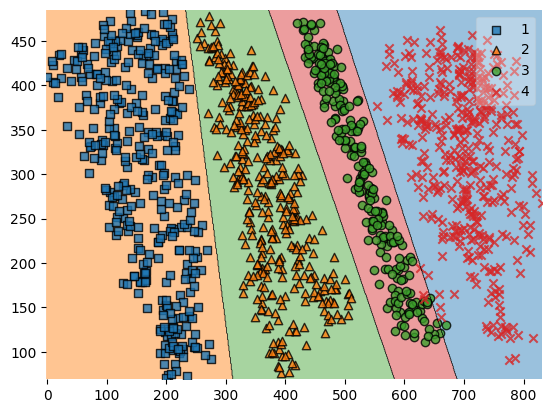

In [142]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=LR_model)

# Problem 2

## 2-1

In [144]:
#مراجعه به صفحه دیتاست و دانلود

##2-2

### 2-2-a

In [145]:
%cd /content

/content


In [146]:
!gdown 14JXJeFLn-V1KSM5yNAiwokaX1F9P3haS
!gdown 1oqLyBpuEfXOpYIZ-aY_gzznCPsBz1pGp

Downloading...
From (original): https://drive.google.com/uc?id=14JXJeFLn-V1KSM5yNAiwokaX1F9P3haS
From (redirected): https://drive.google.com/uc?id=14JXJeFLn-V1KSM5yNAiwokaX1F9P3haS&confirm=t&uuid=4051fcdb-c9ea-4de8-a8a2-e5997cd314a6
To: /content/97.mat
100% 3.90M/3.90M [00:00<00:00, 94.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1oqLyBpuEfXOpYIZ-aY_gzznCPsBz1pGp
From (redirected): https://drive.google.com/uc?id=1oqLyBpuEfXOpYIZ-aY_gzznCPsBz1pGp&confirm=t&uuid=60358149-acb6-43ff-8eff-42e228149403
To: /content/105.mat
100% 2.91M/2.91M [00:00<00:00, 81.6MB/s]


In [147]:
from scipy.io import loadmat
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [148]:
# Load the .mat file
normal_data = loadmat('/content/97.mat')
fault_data = loadmat('/content/105.mat')

In [149]:
print(normal_data.keys())
print(fault_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM'])
dict_keys(['__header__', '__version__', '__globals__', 'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM'])


In [150]:
normal_data_variable = normal_data['X097_DE_time']
print(type(normal_data_variable))  # Print the type of the variable
print(normal_data_variable.shape)  # Print the shape of the variable (if it's a numpy array)

fault_data_variable = fault_data['X105_DE_time']
print(type(fault_data_variable))  # Print the type of the variable
print(fault_data_variable.shape)  # Print the shape of the variable (if it's a numpy array)

<class 'numpy.ndarray'>
(243938, 1)
<class 'numpy.ndarray'>
(121265, 1)


In [151]:
# Extract 10 samples, each containing 5 data points
n_samples = 120
n_data = 220
ext_normal_data = normal_data_variable[:n_samples * n_data, 0]
ext_fault_data = fault_data_variable[:n_samples * n_data, 0]

print(ext_normal_data.shape)
print(ext_fault_data.shape)

(26400,)
(26400,)


In [152]:
# Reshape the extracted data to have 10 rows and 5 columns
ext_normal_data = ext_normal_data.reshape(n_samples, n_data)
ext_fault_data = ext_fault_data.reshape(n_samples, n_data)

print(ext_normal_data.shape)
print(ext_fault_data.shape)

(120, 220)
(120, 220)


### 2-2-b

In [153]:
ext_normal_data[:, 0]

array([ 0.05319692, -0.02148738, -0.09742338,  0.02816308, -0.08448923,
        0.05236246, -0.02691138, -0.02273908, -0.03108369, -0.00354646,
        0.01022215, -0.024408  , -0.04819015, -0.07739631, -0.08198585,
       -0.04756431, -0.09617169, -0.13038462, -0.05653477, -0.11599015,
        0.06300185, -0.06487938, -0.11286092, -0.02920615, -0.03650769,
       -0.018984  , -0.04839877, -0.03859385, -0.13706031, -0.07927385,
        0.02712   , -0.01606338,  0.00980492, -0.11035754,  0.08469785,
        0.01439446, -0.02044431, -0.13330523,  0.03609046, -0.070512  ,
       -0.06112431, -0.07697908, -0.05632615,  0.03066646, -0.02795446,
       -0.00730154, -0.08699262, -0.03400431, -0.17064738,  0.04443508,
       -0.03421292,  0.01105662, -0.06550523,  0.07301538,  0.01397723,
       -0.11703323,  0.01543754, -0.15437538,  0.048816  , -0.08240308,
       -0.08490646, -0.09241662, -0.03775938, -0.04234892, -0.01981846,
       -0.04068   , -0.10764554, -0.04130585, -0.06049846, -0.03

In [154]:
#Normal data feature extraction
normal_standard_deviations = np.std(ext_normal_data, axis=1)
normal_skewnesses = skew(ext_normal_data, axis=1)
normal_kurtoses = kurtosis(ext_normal_data, axis=1)
normal_peak_to_peaks = np.ptp(ext_normal_data, axis=1)
normal_root_mean_squares = np.sqrt(np.mean(np.square(ext_normal_data), axis=1))
normal_means = np.mean(ext_normal_data, axis=1)
normal_absolute_means = np.mean(np.abs(ext_normal_data), axis=1)
normal_peaks = np.max(ext_normal_data, axis=1)

print("Standard Deviations:", normal_standard_deviations.shape)
print("Skewnesses:", normal_skewnesses.shape)
print("Kurtoses:", normal_kurtoses.shape)
print("Peak to Peaks:", normal_peak_to_peaks.shape)
print("Root Mean Squares:", normal_root_mean_squares.shape)
print("Means:", normal_means.shape)
print("Absolute Means:", normal_absolute_means.shape)
print("Peaks:", normal_peaks.shape)

normal_ext_feature_dataset = np.column_stack((normal_standard_deviations, normal_skewnesses, normal_kurtoses, normal_peak_to_peaks,
                              normal_root_mean_squares, normal_means, normal_absolute_means, normal_peaks))


normal_ext_feature_dataset = np.hstack((normal_ext_feature_dataset, np.zeros((len(normal_ext_feature_dataset), 1))))
print("final normal dataset: ", normal_ext_feature_dataset.shape)

Standard Deviations: (120,)
Skewnesses: (120,)
Kurtoses: (120,)
Peak to Peaks: (120,)
Root Mean Squares: (120,)
Means: (120,)
Absolute Means: (120,)
Peaks: (120,)
final normal dataset:  (120, 9)


In [155]:
#fault data feature extraction
fault_standard_deviations = np.std(ext_fault_data, axis=1)
fault_skewnesses = skew(ext_fault_data, axis=1)
fault_kurtoses = kurtosis(ext_fault_data, axis=1)
fault_peak_to_peaks = np.ptp(ext_fault_data, axis=1)
fault_root_mean_squares = np.sqrt(np.mean(np.square(ext_fault_data), axis=1))
fault_means = np.mean(ext_fault_data, axis=1)
fault_absolute_means = np.mean(np.abs(ext_fault_data), axis=1)
fault_peaks = np.max(ext_fault_data, axis=1)

print("Standard Deviations:", fault_standard_deviations.shape)
print("Skewnesses:", fault_skewnesses.shape)
print("Kurtoses:", fault_kurtoses.shape)
print("Peak to Peaks:", fault_peak_to_peaks.shape)
print("Root Mean Squares:", fault_root_mean_squares.shape)
print("Means:", fault_means.shape)
print("Absolute Means:", fault_absolute_means.shape)
print("Peaks:", fault_peaks.shape)

fault_ext_feature_dataset = np.column_stack((fault_standard_deviations, fault_skewnesses, fault_kurtoses, fault_peak_to_peaks,
                              fault_root_mean_squares, fault_means, fault_absolute_means, fault_peaks))

fault_ext_feature_dataset = np.hstack((fault_ext_feature_dataset, np.ones((len(fault_ext_feature_dataset), 1))))
print("final fault dataset: ", fault_ext_feature_dataset.shape)

Standard Deviations: (120,)
Skewnesses: (120,)
Kurtoses: (120,)
Peak to Peaks: (120,)
Root Mean Squares: (120,)
Means: (120,)
Absolute Means: (120,)
Peaks: (120,)
final fault dataset:  (120, 9)


In [156]:
final_data = np.concatenate((normal_ext_feature_dataset, fault_ext_feature_dataset), axis=0)
final_data.shape

(240, 9)

### 2-2-c

In [157]:
shuffled_final_data = shuffle(final_data)
shuffled_final_data.shape

(240, 9)

In [158]:
X = shuffled_final_data[:, :-1]
y = shuffled_final_data[:, -1]
print(X.shape)
print(y.shape)

(240, 8)
(240,)


In [159]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((216, 8), (24, 8), (216,), (24,))

In [160]:
# Reshape y_train and y_test
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((216, 8), (24, 8), (216, 1), (24, 1))

### 2-2-d

In [161]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [162]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

# Transform the training and testing data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## 2-3

In [163]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [164]:
def logestic_regression(x, w):
  y_hat = sigmoid(x @ w)
  return y_hat

In [165]:
def bce(y, y_hat):
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
  return loss

In [166]:
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

In [167]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [168]:
def accuracy(y, y_hat):
  acc = np.sum(y == np.round(y_hat))/len(y)
  return acc

In [169]:
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))

In [170]:
x_train.shape

(216, 9)

In [171]:
m = 8 #num of features
w = np.random.randn(m+1, 1)
print(w.shape)

num_epoch = 1000
eta = 0.01

(9, 1)


In [172]:
error_hist = []

for epoch in range(num_epoch):
  y_hat = logestic_regression(x_train, w)
  loss = bce(y_train, y_hat)
  error_hist.append(loss)
  grads = gradient(x_train, y_train, y_hat)
  w = gradient_descent(w, eta, grads)
  if epoch % 50 == 0:
    print(f'Epoch = {epoch+1}, \t loss = {loss:.4},\t w={w.T[0, 0]}')

Epoch = 1, 	 loss = 1.541,	 w=-0.6670250421700753
Epoch = 51, 	 loss = 1.178,	 w=-0.5438378298329419
Epoch = 101, 	 loss = 0.9187,	 w=-0.4614460153684418
Epoch = 151, 	 loss = 0.7563,	 w=-0.4217055780570787
Epoch = 201, 	 loss = 0.6581,	 w=-0.4171679767927516
Epoch = 251, 	 loss = 0.5946,	 w=-0.4371690346479673
Epoch = 301, 	 loss = 0.5489,	 w=-0.4728386223372663
Epoch = 351, 	 loss = 0.5127,	 w=-0.5180543980953518
Epoch = 401, 	 loss = 0.4822,	 w=-0.5688262207820669
Epoch = 451, 	 loss = 0.4554,	 w=-0.6225800228043226
Epoch = 501, 	 loss = 0.4315,	 w=-0.6776498372096114
Epoch = 551, 	 loss = 0.4097,	 w=-0.7329537896238879
Epoch = 601, 	 loss = 0.3897,	 w=-0.7877908790821124
Epoch = 651, 	 loss = 0.3714,	 w=-0.8417120989209391
Epoch = 701, 	 loss = 0.3544,	 w=-0.8944371540996428
Epoch = 751, 	 loss = 0.3388,	 w=-0.9457996115973567
Epoch = 801, 	 loss = 0.3242,	 w=-0.9957101750893464
Epoch = 851, 	 loss = 0.3107,	 w=-1.0441317653788158
Epoch = 901, 	 loss = 0.2982,	 w=-1.091062439117075

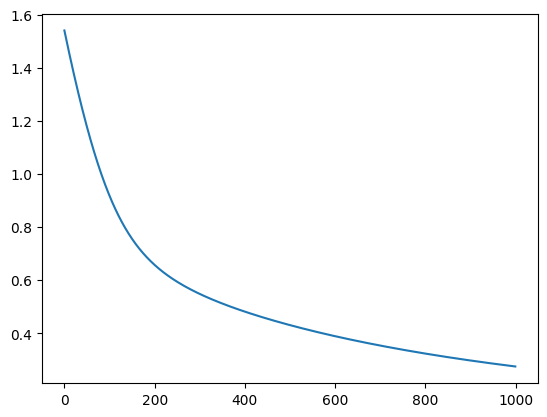

In [173]:
import matplotlib.pyplot as plt
plt.plot(error_hist)

In [174]:
acc_train = accuracy(y_train, y_hat)
print("train accuracy = ", acc_train)

train accuracy =  1.0


### Test

In [175]:
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))

In [176]:
#x_test = np.delete(x_test, 0, axis=1)

In [177]:
x_test.shape

(24, 9)

In [178]:
y_hat_test = logestic_regression(x_test, w)
y_hat_test, y_test

(array([[0.81403658],
        [0.84275554],
        [0.82724955],
        [0.34239133],
        [0.28202897],
        [0.83845882],
        [0.33035748],
        [0.81932766],
        [0.83374464],
        [0.85693381],
        [0.81104212],
        [0.81514447],
        [0.85742628],
        [0.8352449 ],
        [0.85239948],
        [0.36395808],
        [0.28380977],
        [0.28949299],
        [0.83147518],
        [0.8671886 ],
        [0.2988041 ],
        [0.88414019],
        [0.31393461],
        [0.88929423]]),
 array([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.]]))

In [179]:
acc_test = accuracy(y_test, y_hat_test)

from sklearn.metrics import f1_score
f1score = f1_score(y_test, np.round(y_hat_test))
print("test accuracy:", acc_test)
print("test f1score:", f1score)

test accuracy: 1.0
test f1score: 1.0


## 2-4

In [183]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
y_train = y_train.ravel()
SGD_model = SGDClassifier(loss='log_loss' ,
                          max_iter =1000,
                          tol = 1e-3,
                          eta0 = 0.001,
                          learning_rate = 'adaptive' ,
                          random_state=4)
SGD_model.fit(x_train, y_train)
SGD_model.predict(x_test), y_test
print("LR_model train score = ", SGD_model.score(x_train, y_train))
print("LR_model test score = ", SGD_model.score(x_test, y_test))

LR_model train score =  1.0
LR_model test score =  1.0


In [184]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
y_train = y_train.ravel()
LR_model = LogisticRegression(penalty='l2',
                              dual=False,
                              tol = 1e-05,
                              solver='sag',
                              max_iter=1000,
                              C=1,
                              random_state=4)
LR_model.fit(x_train, y_train)
LR_model.predict(x_test)
print("LR_model train score = ", LR_model.score(x_train, y_train))
print("LR_model test score = ", LR_model.score(x_test, y_test))

LR_model train score =  1.0
LR_model test score =  1.0


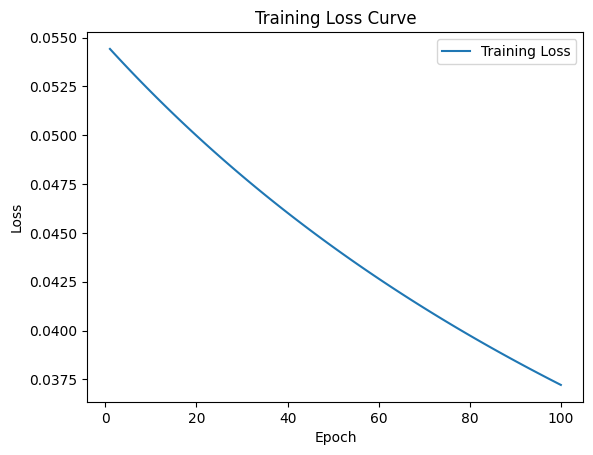

In [186]:
from sklearn.metrics import log_loss
train_loss = []
# Train the classifier and collect loss values
epochs = 100
for epoch in range(epochs):
    SGD_model.partial_fit(x_train, y_train, classes=np.unique(y_train))
    loss = log_loss(y_train, SGD_model.predict_proba(x_train))
    train_loss.append(loss)

# Plot the training loss curve
plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

##2-5

In [187]:
#بصورت توضیحی در گزارش

# Problem 3

## 3-1

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [189]:
%cd /content
!gdown 1fXFPECCGZ7-Kc8wXw8VhfGrsASlAOdAz

/content
Downloading...
From: https://drive.google.com/uc?id=1fXFPECCGZ7-Kc8wXw8VhfGrsASlAOdAz
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 67.3MB/s]


In [190]:
df = pd.read_csv("/content/weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


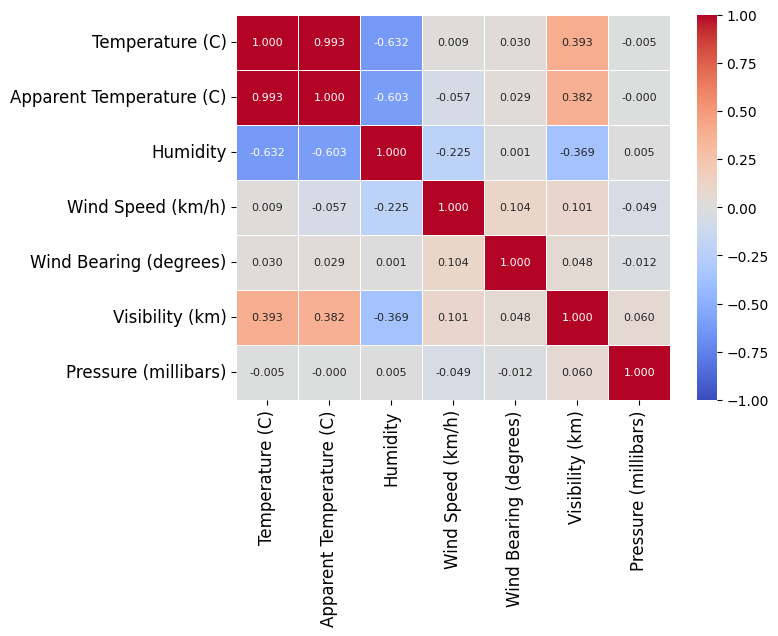

In [191]:
# Exclude the last column from the DataFrame
feature_df = df.iloc[:, [3,4,5,6,7,8,10]]

# Calculate correlation matrix
corr_matrix = feature_df.corr()

# Create heatmap using seaborn with a colormap from -1 to 1
plt.figure(figsize=(7, 5))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f',
            yticklabels=corr_matrix.columns, vmin=-1, vmax=1)  # Set vmin and vmax

# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust margins of PDF file
plt.savefig('PIcS1.pdf', bbox_inches='tight')


In [192]:
Humidity = df['Humidity'].values
Temperature = df["Temperature (C)"].values
Apparent_Temperature = df["Apparent Temperature (C)"].values
Visibility = df["Visibility (km)"].values
print(Humidity.shape, Temperature.shape, Apparent_Temperature.shape, Visibility.shape)

Humidity = np.reshape(Humidity, (-1, 1))
Temperature = np.reshape(Temperature, (-1, 1))
Apparent_Temperature = np.reshape(Apparent_Temperature, (-1, 1))
Visibility = np.reshape(Visibility, (-1, 1))
print(Humidity.shape, Temperature.shape, Apparent_Temperature.shape, Visibility.shape)

(96453,) (96453,) (96453,) (96453,)
(96453, 1) (96453, 1) (96453, 1) (96453, 1)


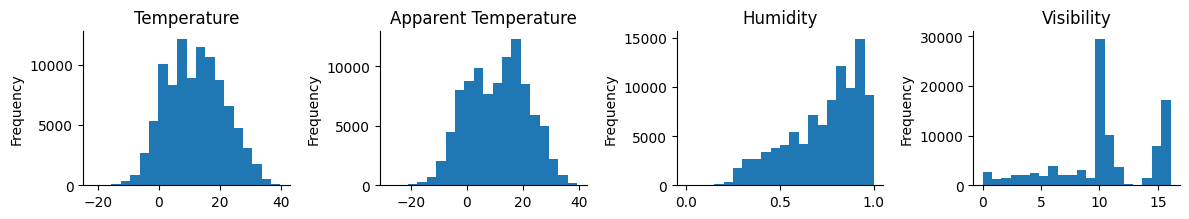

In [193]:
# Plot histogram for 'Temperature (C)'
plt.figure(figsize=(12, 2.3))
plt.subplot(1, 4, 1)
feature_df['Temperature (C)'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

# Plot histogram for 'Apparent Temperature (C)'
plt.subplot(1, 4, 2)
feature_df['Apparent Temperature (C)'].plot(kind='hist', bins=20, title='Apparent Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

# Plot histogram for 'Humidity'
plt.subplot(1, 4, 3)
feature_df['Humidity'].plot(kind='hist', bins=20, title='Humidity')
plt.gca().spines[['top', 'right']].set_visible(False)

# Plot histogram for 'Visibility'
plt.subplot(1, 4, 4)
feature_df['Visibility (km)'].plot(kind='hist', bins=20, title='Visibility')
plt.gca().spines[['top', 'right']].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


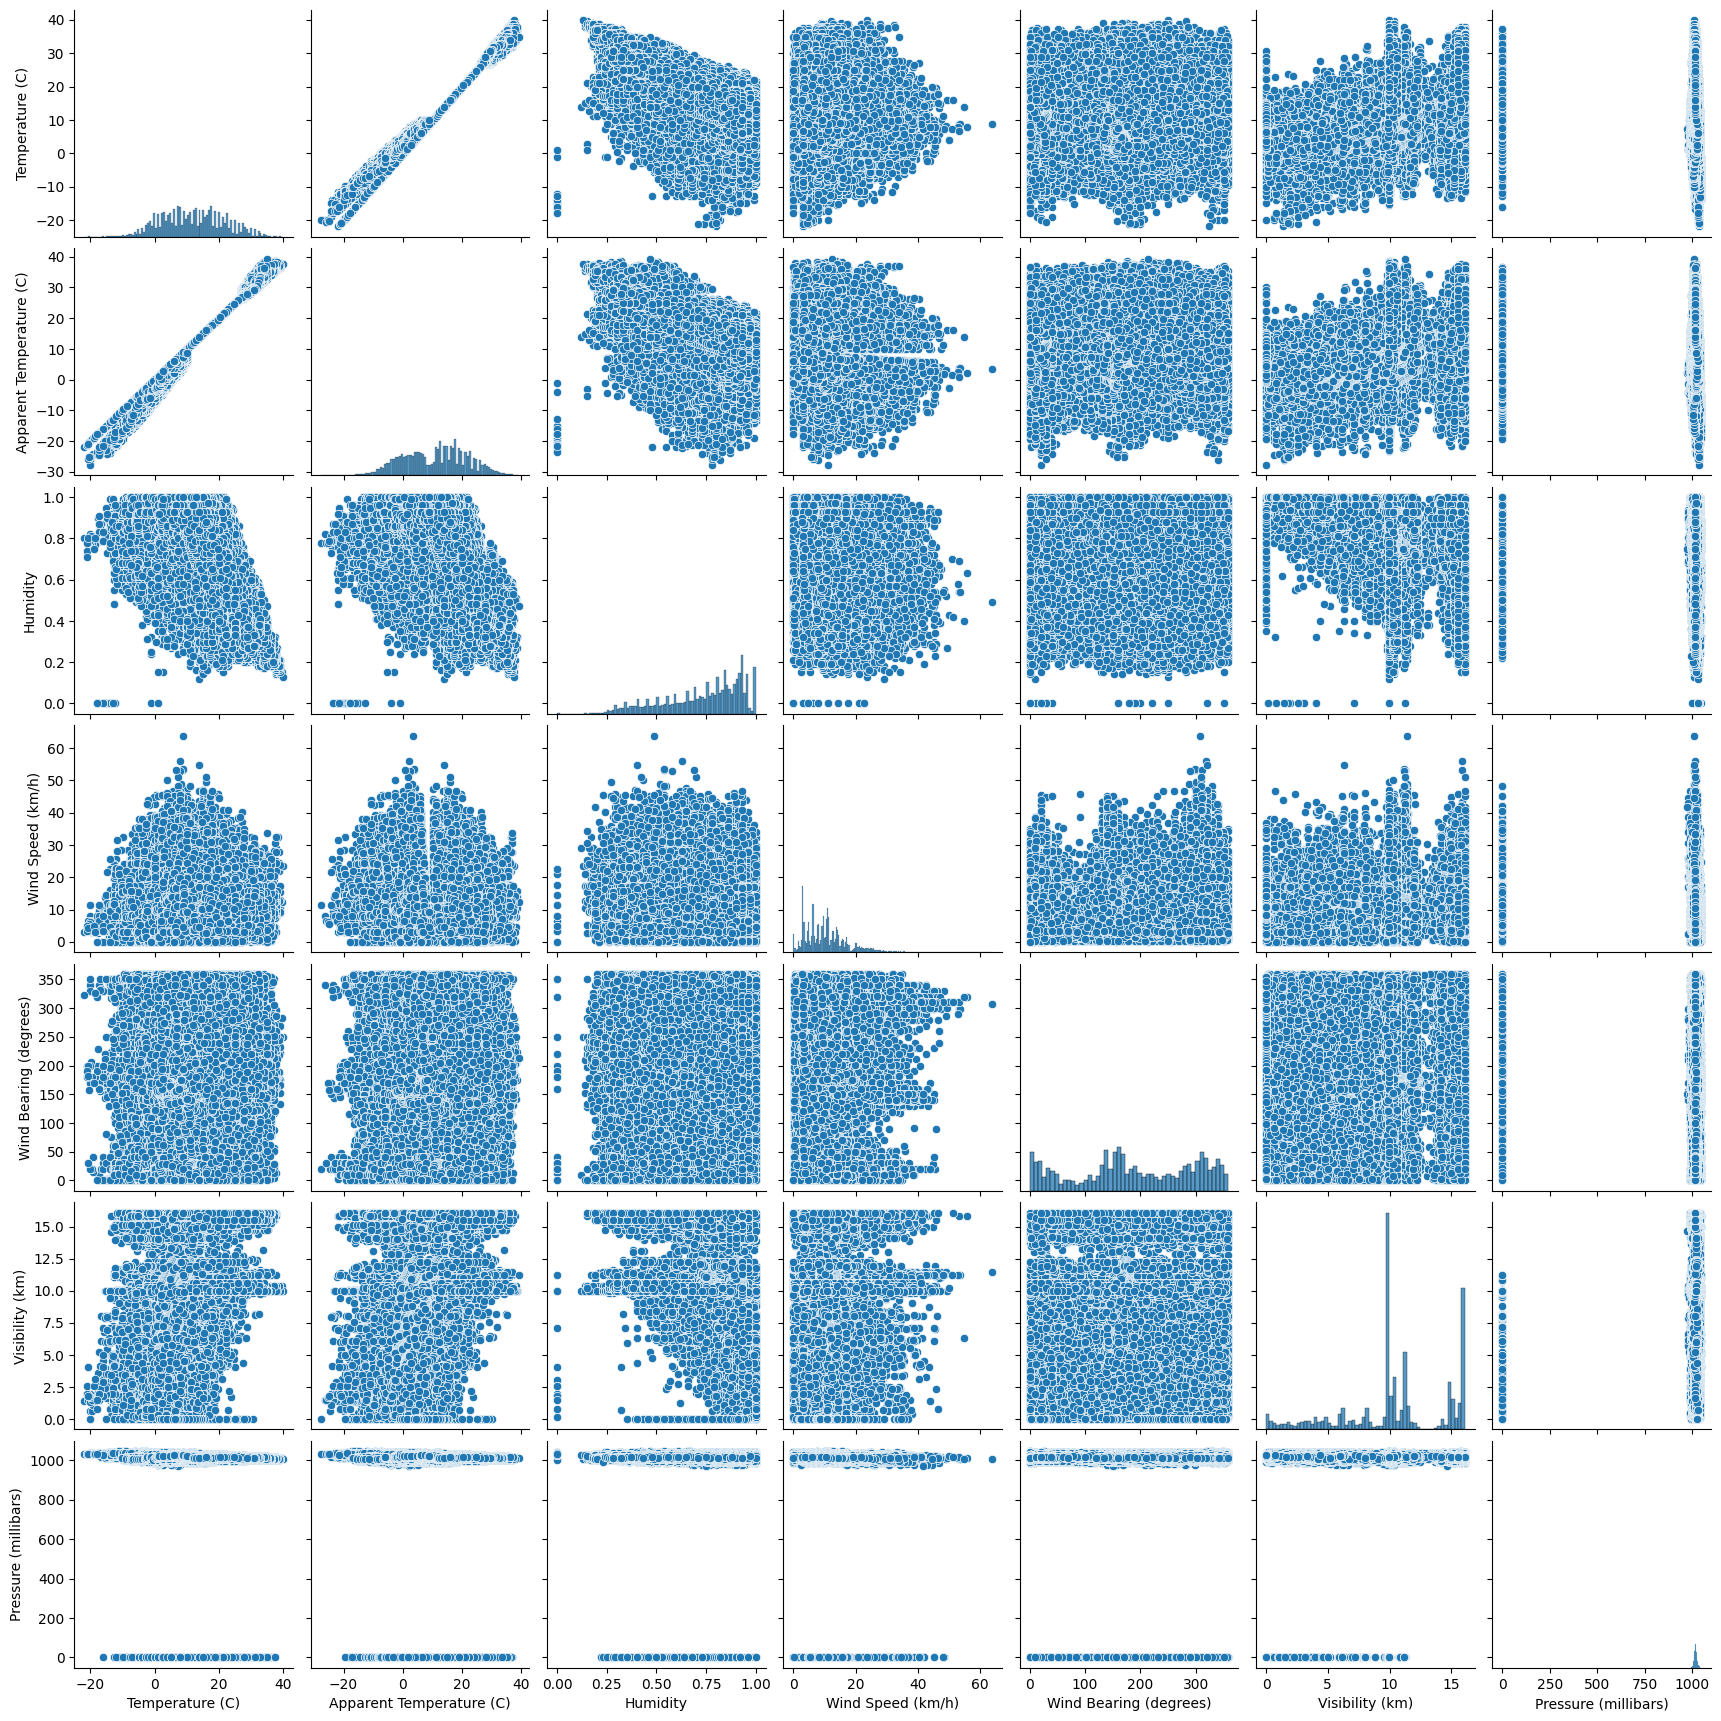

In [194]:
sns.pairplot(feature_df)

## 3-2

### LS

In [195]:
class LinearRegressionLS:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Compute the coefficients using the least squares method
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Predict the target variable
        return X.dot(self.coefficients)

In [196]:
Temperature.shape


(96453, 1)

In [197]:
type(Humidity)

numpy.ndarray

In [198]:

# X = Humidity
# X = np.concatenate((Humidity, Temperature), axis=1)
# y = Apparent_Temperature
X = np.concatenate((Humidity, Temperature, Visibility), axis=1)
y = Apparent_Temperature

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print()


# Initialize and fit the linear regression model using least squares
model = LinearRegressionLS()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

(77162, 3) (19291, 3) (77162, 1) (19291, 1)

Mean Squared Error: 1.5746506582916415


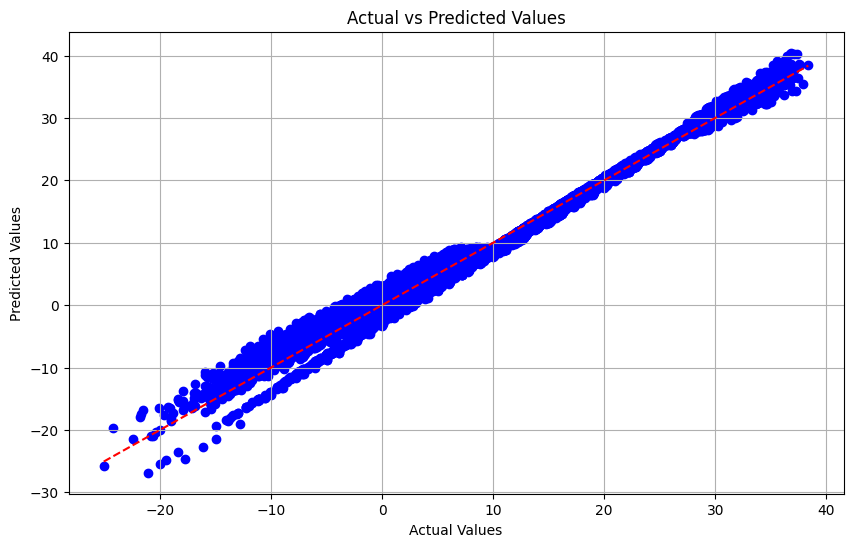

In [199]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


### RLS

In [200]:
class RecursiveLeastSquares:
    def __init__(self, n_features, forgetting_factor=0.99):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))  # Initialize model parameters
        self.P = np.eye(n_features)  # Initialize covariance matrix

    def fit(self, X, y):
        errors = []
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y[i]

            # Predict
            y_pred = np.dot(x_i.T, self.theta)

            # Update
            error = y_i - y_pred
            errors.append(error)
            K = np.dot(self.P, x_i) / (self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
            self.theta = self.theta + np.dot(K, error)
            self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))

        return errors

    def predict(self, X):
        return np.dot(X, self.theta)

Mean Squared Error: 1.9924075412456532



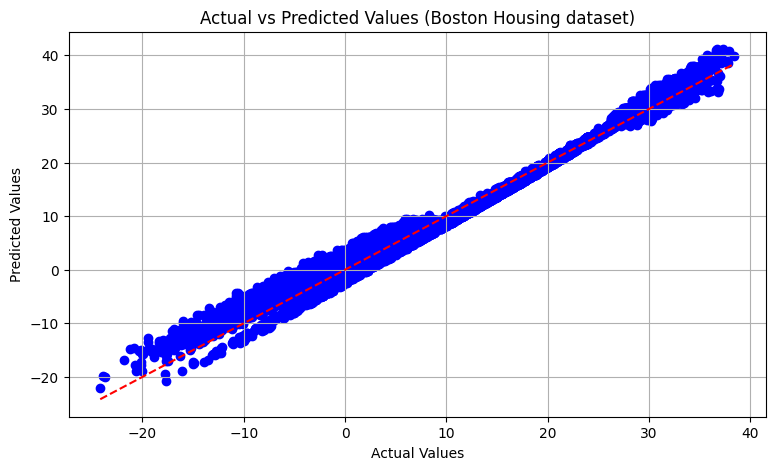

In [201]:
# Split the dataset into features (X) and target variable (y)
# X = np.concatenate((Humidity, Temperature), axis=1)
# y = Apparent_Temperature
X = np.concatenate((Humidity, Visibility, Temperature), axis=1)
y = Apparent_Temperature

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RLS model
rls = RecursiveLeastSquares(n_features=X_train.shape[1], forgetting_factor=0.99)
errors = rls.fit(X_train, y_train)

# Make predictions
y_pred = rls.predict(X_test)

# Calculate Mean Squared Error
mse = np.mean(np.array(errors)**2)
print("Mean Squared Error:", mse)
print()

# Plot actual vs predicted values
plt.figure(figsize=(9, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Boston Housing dataset)')
plt.grid(True)
plt.show()

In [202]:
mse_list = []
for ff in np.linspace(0.5, 0.99, 30):
    # Initialize and fit the RLS model
    rls = RecursiveLeastSquares(n_features=X_train.shape[1], forgetting_factor = ff)
    errors = rls.fit(X_train, y_train)

    # Make predictions
    y_pred = rls.predict(X_test)

    # Calculate Mean Squared Error
    mse = np.mean(np.array(errors)**2)
    mse_list.append(mse)
    # print("Mean Squared Error:", mse, "           Forgetting Factor:", ff)
    print("Mean Squared Error: {:.10f}      Forgetting Factor: {:.10f}".format(mse, ff))

Mean Squared Error: 4.7292146825      Forgetting Factor: 0.5000000000
Mean Squared Error: 4.5707946946      Forgetting Factor: 0.5168965517
Mean Squared Error: 4.4209272142      Forgetting Factor: 0.5337931034
Mean Squared Error: 4.2788022404      Forgetting Factor: 0.5506896552
Mean Squared Error: 4.1437247651      Forgetting Factor: 0.5675862069
Mean Squared Error: 4.0150943500      Forgetting Factor: 0.5844827586
Mean Squared Error: 3.8923863773      Forgetting Factor: 0.6013793103
Mean Squared Error: 3.7751353399      Forgetting Factor: 0.6182758621
Mean Squared Error: 3.6629209647      Forgetting Factor: 0.6351724138
Mean Squared Error: 3.5553578762      Forgetting Factor: 0.6520689655
Mean Squared Error: 3.4520890250      Forgetting Factor: 0.6689655172
Mean Squared Error: 3.3527824761      Forgetting Factor: 0.6858620690
Mean Squared Error: 3.2571305976      Forgetting Factor: 0.7027586207
Mean Squared Error: 3.1648504035      Forgetting Factor: 0.7196551724
Mean Squared Error: 

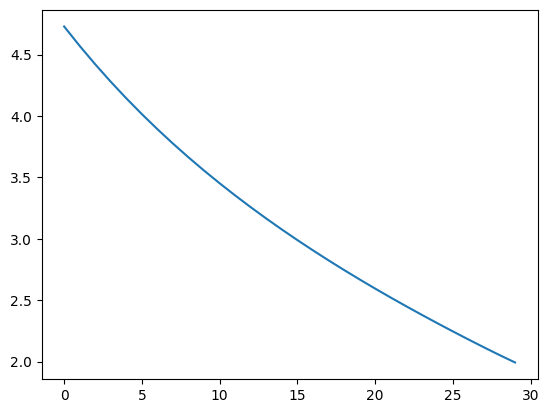

In [203]:
plt.plot(mse_list)

In [204]:
# X = Humidity
X = Visibility
y = Temperature

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print()


# Initialize and fit the linear regression model using least squares
model = LinearRegressionLS()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

(77162, 1) (19291, 1) (77162, 1) (19291, 1)

Mean Squared Error: 77.21116286449414


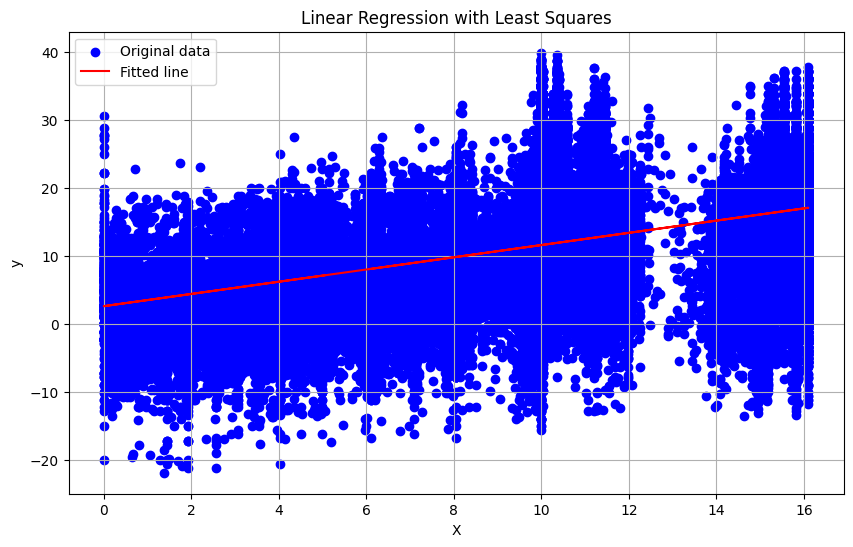

In [205]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Original data')
plt.plot(X_test, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Least Squares')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 78.57103392587662


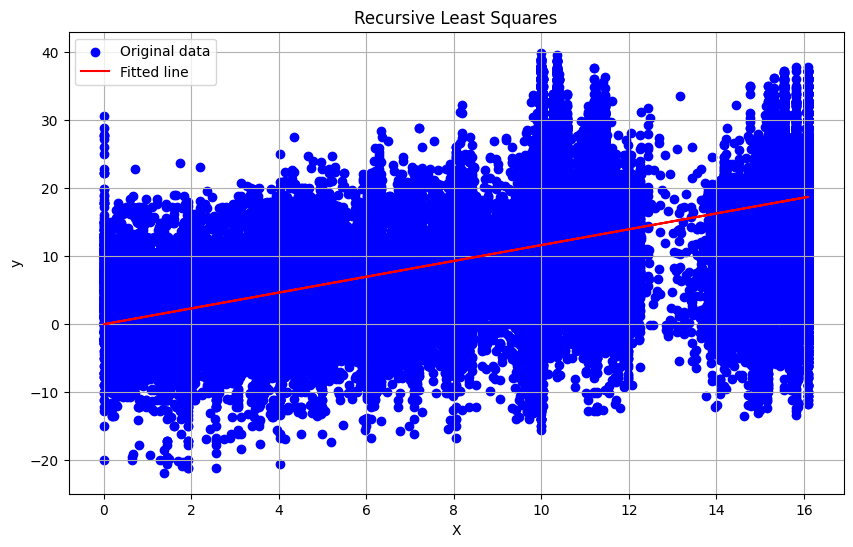

In [206]:
# Initialize and fit the RLS model
rls = RecursiveLeastSquares(n_features=1)
errors = rls.fit(X_train, y_train)

# Make predictions
y_pred = rls.predict(X)

# Calculate Mean Squared Error
mse = np.mean(np.array(errors)**2)
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Recursive Least Squares')
plt.legend()
plt.grid(True)
plt.show()


In [207]:
# Split the dataset into features (X) and target variable (y)
X = Humidity
y = Temperature

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RLS model
rls = RecursiveLeastSquares(n_features=X_train.shape[1], forgetting_factor=0.99)
errors = rls.fit(X_train, y_train)

# Make predictions
y_pred = rls.predict(X_test)

# Calculate Mean Squared Error
mse = np.mean(np.array(errors)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 134.29233585865848


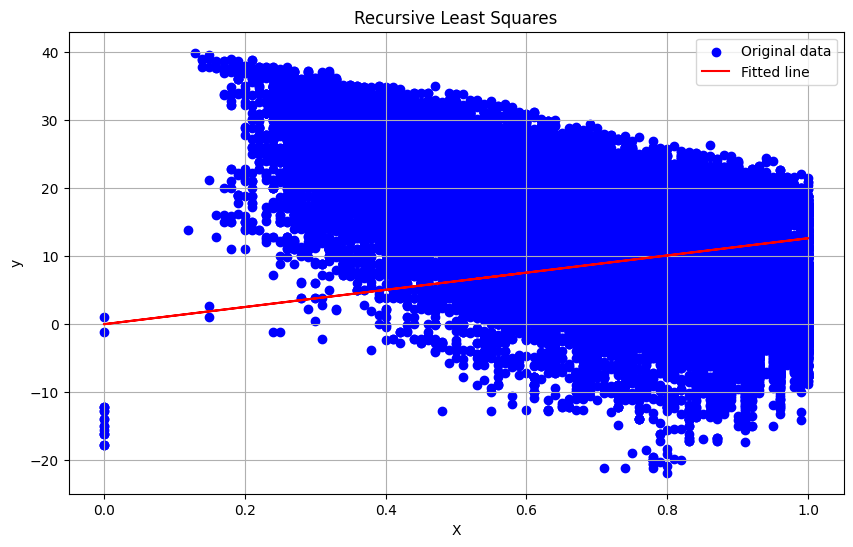

In [208]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Original data')
plt.plot(X_test, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Recursive Least Squares')
plt.legend()
plt.grid(True)
plt.show()

## 3-3

In [209]:
X = np.concatenate((Humidity, Temperature, Visibility), axis=1)
y = Apparent_Temperature

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print()

error_variance = 2  # Modify this value based on your estimation

# Calculate weights based on the estimated variance
weights = 1 / error_variance

# Fit the weighted least squares model
X_with_intercept = sm.add_constant(X_train)  # Add intercept term
model = sm.WLS(y_train, X_with_intercept, weights=weights)
result = model.fit()

# Print the model summary
print(result.summary())

(77162, 3) (19291, 3) (77162, 1) (19291, 1)

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            WLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.866e+06
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:27:54   Log-Likelihood:            -1.2655e+05
No. Observations:               77162   AIC:                         2.531e+05
Df Residuals:                   77158   BIC:                         2.531e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

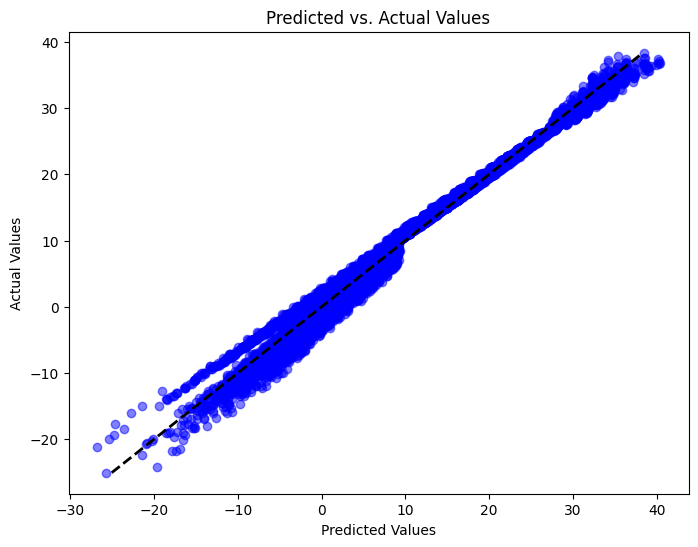

In [210]:
X_test_with_intercept = sm.add_constant(X_test)
y_pred = result.predict(X_test_with_intercept)

# Plot Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()